<a href="https://colab.research.google.com/github/franciscomartino/MIAD-ANS-Team6/blob/main/C%C3%B3digo/Proyecto_ANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)



DIMENSIONES 

Dimensiones:  15528  filas y  78 columnas

COLUMNAS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15528 entries, 0 to 15527
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             15528 non-null  object 
 1   ESTU_NACIONALIDAD              15528 non-null  object 
 2   ESTU_GENERO                    15523 non-null  object 
 3   ESTU_FECHANACIMIENTO           15528 non-null  object 
 4   PERIODO                        15528 non-null  int64  
 5   ESTU_CONSECUTIVO               15528 non-null  object 
 6   ESTU_ESTUDIANTE                15528 non-null  object 
 7   ESTU_PAIS_RESIDE               15528 non-null  object 
 8   ESTU_TIENEETNIA                13837 non-null  object 
 9   ESTU_DEPTO_RESIDE              15520 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          15520 non-null  float64
 11  ESTU_MCPIO_RESIDE              15520 

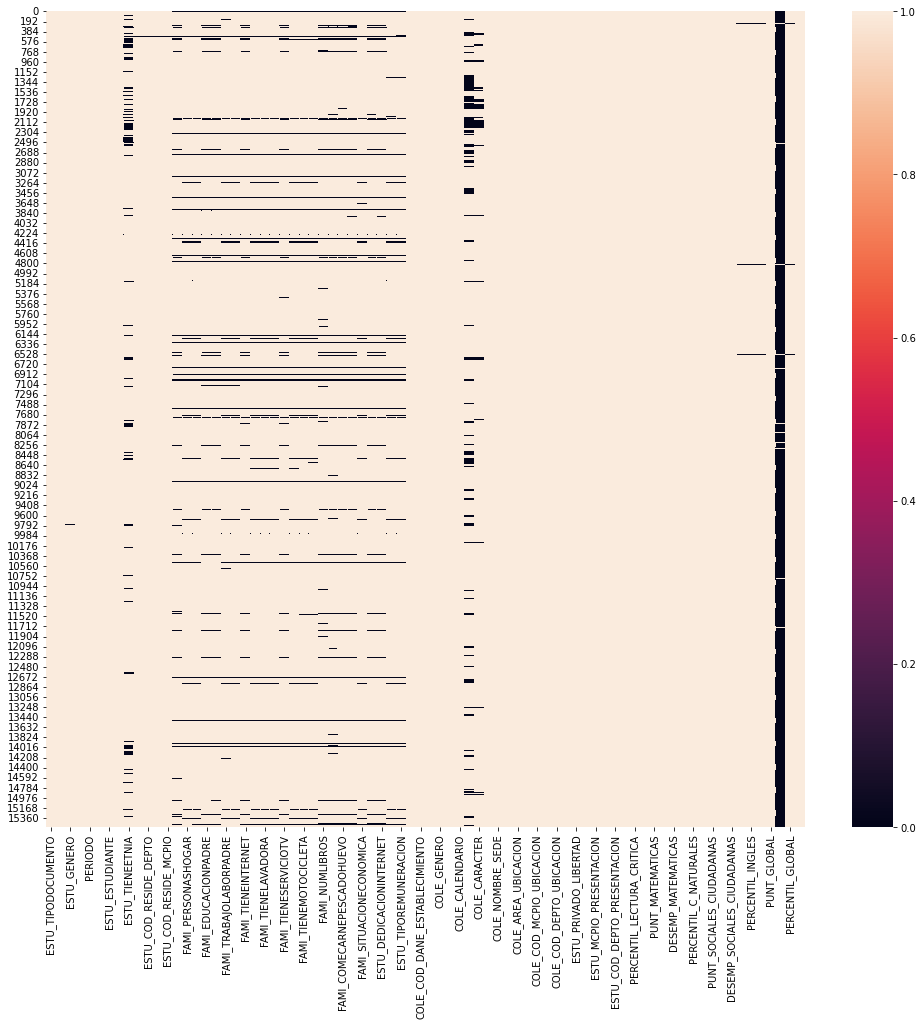

In [17]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# parte a
#/content/drive/MyDrive/Data/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv
#datos = pd.read_csv('/content/drive/MyDrive/Data/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')
datos = pd.read_csv('/content/drive/MyDrive/Data/SB11_20211.txt', sep="¬")
datos = pd.DataFrame(datos)
datos.head()

# Dimensiones de los datos:
print("\nDIMENSIONES \n")
print("Dimensiones: ", datos.shape[0], " filas y ", datos.shape[1], "columnas")

# Columnas
print("\nCOLUMNAS \n")
print(datos.info())

# Datos faltantes
print("\nDATOS FALTANTES \n")
null_columns = datos.columns[datos.isnull().any()]
print(null_columns)

print("\nCantidad de datos faltantes por columna\n")
print(datos[null_columns].isnull().sum().sort_values(ascending=False))
f, ax = plt.subplots(figsize=(17,15))
ax = sns.heatmap(datos.notna())

In [18]:
# Selección preliminar de variables a analizar
cols = ["ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO","ESTU_TIENEETNIA", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA",
      "FAMI_TIENEINTERNET", "ESTU_HORASSEMANATRABAJA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES",
      "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL"]


In [15]:
# Estadísticas descriptivas para las variables numéricas
datos[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,15528.0,20211.000000,0.000000,20211.0,20211.0,20211.0,20211.0,20211.0
PUNT_LECTURA_CRITICA,15528.0,61.458655,11.119310,0.0,55.0,63.0,69.0,100.0
PUNT_MATEMATICAS,15528.0,61.232226,13.483022,15.0,53.0,62.0,71.0,100.0
PUNT_C_NATURALES,15528.0,57.961618,11.358429,0.0,50.0,59.0,66.0,100.0
PUNT_SOCIALES_CIUDADANAS,15528.0,58.145093,13.017355,0.0,50.0,60.0,68.0,100.0
PUNT_INGLES,15481.0,68.414637,16.989953,0.0,56.0,72.0,82.0,100.0
PUNT_GLOBAL,15528.0,301.820325,57.620860,22.0,263.0,309.0,345.0,495.0


In [16]:
# Estadísticas descriptivas para las variables categóricas
datos[cols].describe(include=['O']).T

,count,unique,top,freq
ESTU_GENERO,15523,2,M,7793
ESTU_FECHANACIMIENTO,15528,2863,24/04/2003,30
ESTU_TIENEETNIA,13837,2,No,13704
ESTU_DEPTO_RESIDE,15520,29,VALLE,7066
FAMI_ESTRATOVIVIENDA,14772,7,Estrato 3,3442
FAMI_TIENEINTERNET,14848,2,Si,14450
ESTU_HORASSEMANATRABAJA,14980,5,0,11523


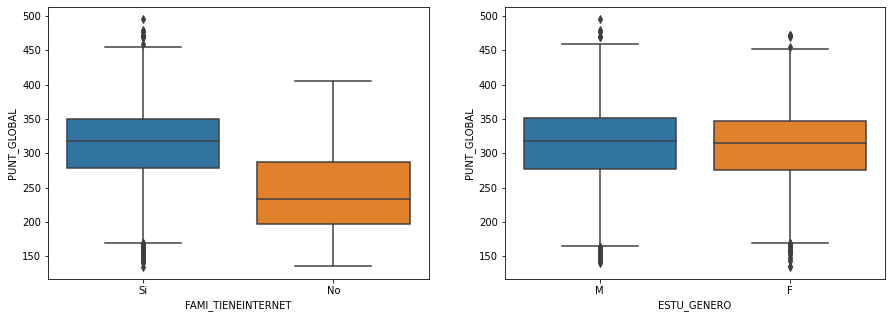

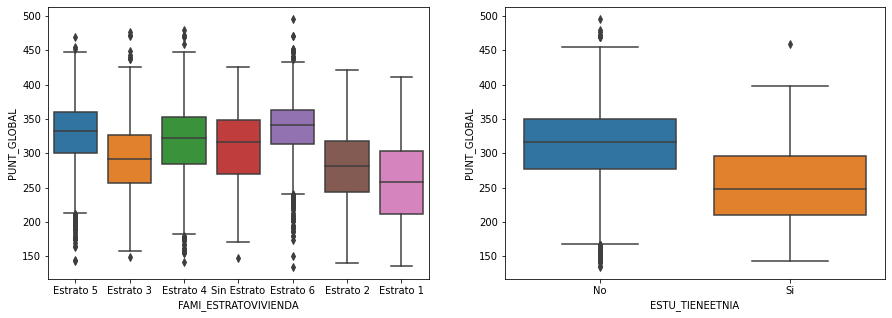

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 5))

df_clean = datos[cols].dropna()

## Análisis por genero vs puntaje global
sns.boxplot(ax = axs[1],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "ESTU_GENERO",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por internet vs puntaje global
sns.boxplot(ax = axs[0],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "FAMI_TIENEINTERNET",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por etnias vs puntaje global
sns.boxplot(ax = axs2[1],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "ESTU_TIENEETNIA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

## Análisis por estrato vs puntaje global
sns.boxplot(ax = axs2[0],
            y = "PUNT_GLOBAL",  # Establecemos la varible a la que le queremos sacar el diagrama de caja.
            x = "FAMI_ESTRATOVIVIENDA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            data = df_clean
            ); 

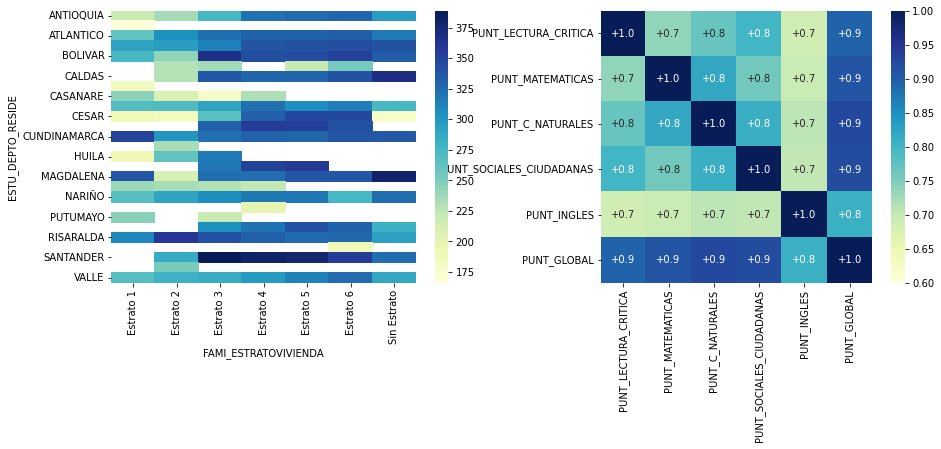

In [23]:
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 5))
## Análisis del puntaje global por depto y estrato
y = pd.pivot_table(df_clean, values="PUNT_GLOBAL", index=["ESTU_DEPTO_RESIDE"], columns=["FAMI_ESTRATOVIVIENDA"], aggfunc=np.mean)
mapa_calor = sns.heatmap(y,                      # Utilizamos la base de datos de vuelos.
                         annot = False,               # Mostramos las anotaciones.
                         #fmt = "d"                    # Ajustamos el formato de los números.
                         ax = axs1[0],
                         cmap="YlGnBu"
                         )  


## Análisis de la correlación entre el puntaje global y las pruebas particulares 
cols_corr = ["PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS", 
             "PUNT_INGLES", "PUNT_GLOBAL"]

sns.heatmap(df_clean[cols_corr].corr(), cmap="YlGnBu", annot=True, square=True,
    vmin=0.6, vmax=1, fmt="+.1f", ax = axs1[1])

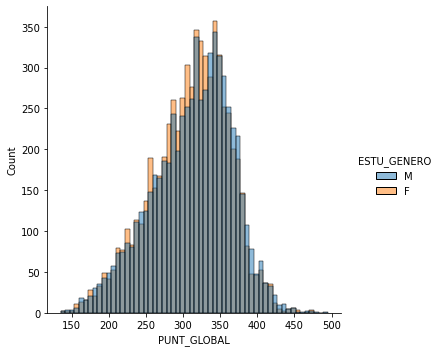

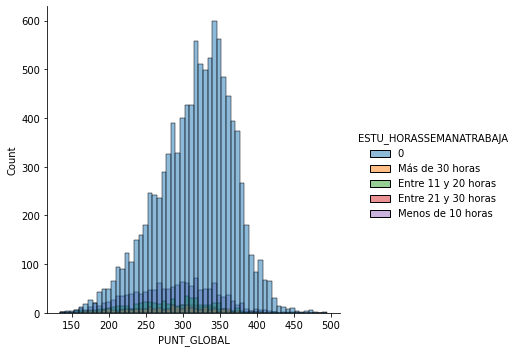

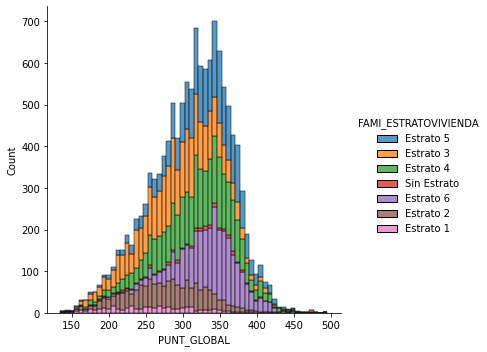

In [24]:
## Análisis por género vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "ESTU_GENERO"              # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            # multiple = "stack"      # Apilamos las barras.
            )   

## Análisis por trabaja vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "ESTU_HORASSEMANATRABAJA"              # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            # multiple = "stack"      # Apilamos las barras.
            )   

## Análisis por estrato vs puntaje global
sns.displot(data = df_clean,             # Utilizamos la base de datos de pingüinos.
            x = "PUNT_GLOBAL",      # Establecemos la varible a la que le queremos sacar el histograma.
            hue = "FAMI_ESTRATOVIVIENDA",            # Clasificamos los valores de acuerdo a una categoría. En este caso, especies.
            multiple = "stack"      # Apilamos las barras.
            )

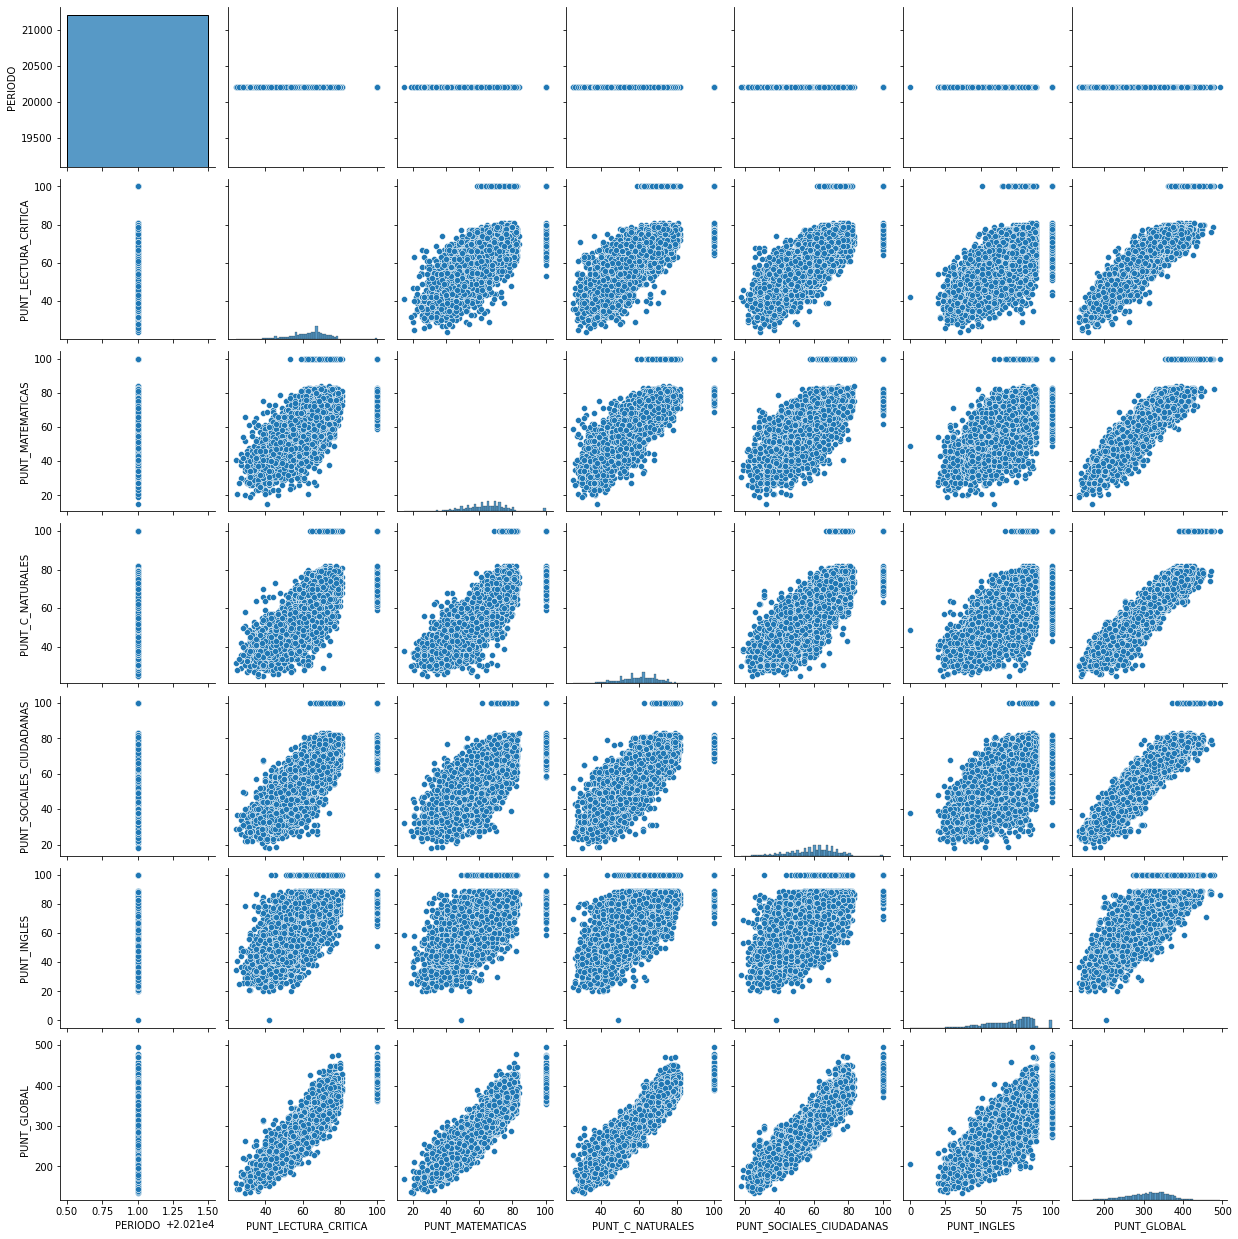

In [25]:
# Análisis de las variables cuantitativas
#print("\nVARIABLES CUANTITATIVAS \n")
sns.pairplot(df_clean)